<a href="https://colab.research.google.com/github/Jaeljane/100-days-of-code/blob/main/Health_Care_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Enhancing Healthcare Accessibility in Nairobi, Kenya



In [ ]:
#import libraries to be used
import warnings

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option('display.max_columns', None)

warnings.filterwarnings("ignore")

##Data Set to be used

In [ ]:
#import link for Health care services
link_health_centres="https://open.africa/dataset/3e95b5cb-39f5-44d3-94b6-f2d5285b0478/resource/0257f153-7228-49ef-b330-8e8ed3c7c7e8/download/ehealth-kenya-facilities-download-21102015.xls"
#import population lik
people="https://open.africa/dataset/9b94fe50-9d75-4b92-be00-6354c6e6cc88/resource/f1fca3c3-af10-4b55-b33a-95e8fbbd8dc2/download/kenya-population-by-sub-county.csv"
#import human-waste-disposal data
waste_link="https://open.africa/dataset/9b94fe50-9d75-4b92-be00-6354c6e6cc88/resource/8ea5c765-5de9-4b71-9454-8471cd841b6b/download/percentage-distribution-of-conventional-households-by-main-mode-of-human-waste-disposal-county-a.csv"
#import water source Link
water_link="https://open.africa/dataset/9b94fe50-9d75-4b92-be00-6354c6e6cc88/resource/ea9263c3-3c48-4b23-9a79-b175945e690e/download/percentage-distribution-of-conventional-households-by-main-source-of-drinking-water-county-and-s.csv"


### Demographic data

In [ ]:
df_people=pd.read_csv(people, skiprows=6, usecols=range(5))
#remove white spaces
df_people.name=df_people.name.str.strip().str.upper()
df_people['name']= np.where(df_people['name'].str.contains("LANG'ATA"), "LANGATA", df_people['name'])
#df_people['Sub_County']=df_people['name']
df_people.tail(10)

,name,Male,Female,Intersex,Total
383,EMBAKASI,492476,496270,62.0,988808
384,KAMUKUNJI,136670,131599,7.0,268276
385,KASARANI,381234,399385,37.0,780656
386,KIBRA,94199,91569,9.0,185777
387,LANGATA,96698,100774,17.0,197489
388,MAKADARA,96369,93157,10.0,189536
389,MATHARE,106522,100028,14.0,206564
390,NJIRU,307642,318809,31.0,626482
391,STAREHE,109173,101238,12.0,210423
392,WESTLANDS,153818,155021,15.0,308854


### Main Source of drinking Water Data

In [ ]:
df_water=pd.read_csv(water_link)
df_water.drop(columns=['Conventional Households'], inplace=True)
df_water.tail(10)

,County/ Sub-County,Pond,Dam/ Lake,Stream/ River,Protected Spring,Unprotected Spring,Protected Well,Unprotected Well,Borehole/ Tube well,Piped into dwelling,Piped to yard/ Plot,Bottled water,Rain/ Harvested water,Water Vendor,Public tap/ Standpipe,Not Stated
386,KAMUKUNJI,0.0,0.6,0.0,0.2,0.1,0.5,0.0,1.6,26.9,28.6,5.2,0.0,10.2,25.9,0.1
387,KASARANI,0.0,0.1,0.0,0.5,0.0,0.1,0.0,1.7,34.8,33.9,5.5,0.1,7.1,16.0,0.0
388,KIBRA,0.0,0.0,0.0,1.4,0.1,0.3,0.0,1.3,11.0,20.6,3.8,0.1,16.1,45.1,0.0
389,LANGATA,0.2,0.2,0.0,0.2,0.0,0.3,0.0,8.6,26.2,11.5,18.7,0.2,11.7,22.2,0.1
390,MAKADARA,0.0,0.2,0.1,0.1,0.1,0.1,0.1,0.5,18.8,21.6,3.3,0.2,28.1,27.0,0.0
391,MATHARE,0.0,0.0,0.0,0.3,0.0,0.1,0.0,0.3,10.1,41.9,0.8,0.1,19.3,27.0,0.1
392,NJIRU,0.0,0.1,0.0,0.4,0.0,0.3,0.0,5.6,21.8,39.8,5.3,1.8,14.6,10.2,0.1
393,STAREHE,0.0,0.2,0.0,0.5,0.0,0.2,0.0,2.3,27.4,23.8,9.2,0.1,10.0,26.1,0.1
394,WESTLANDS,0.0,0.2,0.1,1.1,0.0,0.3,0.0,2.5,25.5,28.3,15.6,0.1,6.4,19.8,0.0
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Solid Waste Disposal Data

In [ ]:
df_waste=pd.read_csv(waste_link)
df_waste = df_waste.rename(columns={df_waste.columns[0]: 'Sub-county'})
#df_waste['Sub-county']=np.where(df_waste['Sub-county'].str.contains('LANGATA'), "LANG'ATA", df_waste['Sub-county'])

df_waste.tail(10)

,Sub-county,Conventional Households,Main Sewer,Septic tank,Cess pool,VIP Latrine,Pit latrine covered,Pit Latrine uncovered,Bucket latrine,Open/ Bush,Bio-septic tank/ Biodigester,Not Stated
385,EMBAKASI,"346,462",66.1,12.2,0.4,4.3,12.9,1.6,2.1,0.1,0.3,0.0
386,KAMUKUNJI,"83,680",74.0,8.2,1.7,2.7,9.0,0.9,2.9,0.1,0.4,0.1
387,KASARANI,"268,611",42.2,37.1,0.6,5.3,11.9,2.1,0.6,0.0,0.2,0.0
388,KIBRA,"61,651",37.0,5.4,0.3,11.8,38.8,4.7,0.9,0.3,0.8,0.0
389,LANGATA,"60,187",54.1,15.4,0.1,7.1,18.5,3.3,0.2,0.3,1.0,0.1
390,MAKADARA,"70,080",77.5,7.1,0.9,2.7,6.7,0.7,4.0,0.1,0.3,0.0
391,MATHARE,"74,967",73.8,6.9,0.5,5.3,9.2,2.1,1.8,0.1,0.1,0.1
392,NJIRU,"204,492",58.1,22.7,0.5,5.7,11.2,1.0,0.3,0.1,0.3,0.1
393,STAREHE,"66,108",63.3,12.4,0.8,6.4,13.2,2.2,1.5,0.1,0.2,0.1
394,WESTLANDS,"103,489",45.3,19.5,0.7,8.6,22.4,2.4,0.6,0.2,0.5,0.0


## Clean and Combine the data sets

In [ ]:
#columns to be dropped
cols=['Nearest Town', 'Official Landline', 'Official Fax', 'Official Mobile', 'Official Email', 'Official Address',
      'Official Alternate No', 'Town', 'Post Code', 'County/ Sub-County', 'name']

In [ ]:
#Create a wrangle function that will be used to clean the data
def wrangle(link):
  #read in the Health centre link
  data=pd.read_excel(link)
  #Filter data to retain data from Nairobi Province
  data=data[data['Province']=="Nairobi"]

  data['Division'] = data['Division'].fillna('UNKNOWN')
   # Extract the Subcouny from the Constituency Column, this will be used to join other data sets
  data['Sub-county'] = np.where(data['Constituency'].str.contains('DAGORETTI'), 'DAGORETTI',
                              np.where(data['Constituency'].str.contains('EMBAKASI') & (~data['Division'].str.contains('Njiru', na=False)), 'EMBAKASI',
                              np.where(data['Constituency'].str.contains('KASARANI') & (~data['Division'].str.contains('Njiru', na=False)), 'KASARANI',
                              np.where(data['Division'].str.contains("Njiru"), 'NJIRU',
                              np.where(data['Constituency'].str.contains("LANG'ATA"), 'LANGATA',
                              np.where(data['Constituency'].str.contains("ROYSAMBU"), 'KASARANI',
                              np.where(data['Constituency'].str.contains('RUARAKA'), 'KASARANI',
                              data['Constituency'])))))))

#Classify the Owner into broader groups
  data['Classification']=np.where(data['Owner'].str.contains('Private'),'Private',
                         np.where(data['Owner'].str.contains('Christian'), 'Faith Based Institution',
                         np.where(data['Owner'].str.contains('Supreme Council for Kenya Muslims'), 'Faith Based Institution',
                          np.where(data['Owner'].str.contains('Catholic Secretariat'), 'Faith Based Institution',
                          np.where(data['Owner'].str.contains('Humanitarian Agencies'), 'Non-Governmental Organizations',
                          np.where(data['Owner'].str.contains('State Coorporation'), 'Parastatal',
                           np.where(data['Owner'].str.contains('Faith Based'), 'Faith Based Institution', data['Owner']

  )))))))

#Merge the data set with Waste disposal data set
  data=data.merge(df_waste, left_on='Sub-county', right_on='Sub-county', how='left')

  #Merge with Water Data
  data=data.merge(df_water, left_on="Sub-county", right_on="County/ Sub-County", how='left')

  #Merge with People data
  data=data.merge(df_people, left_on='Sub-county', right_on='name', how='left')

  #drop columns that have only Nulls in the whole dataset
  data.dropna(axis=1, how='all', inplace=True)

  #drop address and Unnecessary columns
  for col in cols:
    data.drop(columns=col, inplace=True)

#Return the cleaned dataset
  return data
#Extract the Health data
df=wrangle(link_health_centres)
#print the size of the dataset
print(df.shape)
#Read in the first 5 rows
df.head(5)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(942, 56)


,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,Description of Location,Constituency,Beds,Cots,In Charge,Job Title of in Charge,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD,Sub-county,Classification,Conventional Households,Main Sewer,Septic tank,Cess pool,VIP Latrine,Pit latrine covered,Pit Latrine uncovered,Bucket latrine,Open/ Bush,Bio-septic tank/ Biodigester,Not Stated_x,Pond,Dam/ Lake,Stream/ River,Protected Spring,Unprotected Spring,Protected Well,Unprotected Well,Borehole/ Tube well,Piped into dwelling,Piped to yard/ Plot,Bottled water,Rain/ Harvested water,Water Vendor,Public tap/ Standpipe,Not Stated_y,Male,Female,Intersex,Total
0,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,Situated near Ndururumo Primary School (Juja R...,MATHARE,0.0,0.0,Caroline Achieng,Clinical Officer,N,Y,Operational,NaN,NaN,NaN,NaN,NaN,MATHARE,Private,"74,967",73.8,6.9,0.5,5.3,9.2,2.1,1.8,0.1,0.1,0.1,0.0,0.0,0.0,0.3,0.0,0.1,0.0,0.3,10.1,41.9,0.8,0.1,19.3,27.0,0.1,106522,100028,14.0,206564
1,13043,7Kr Mrs Health Centre,Nairobi,Nairobi,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,"Next to Nairobi Opharnage,Off Lang'ata rd.",LANG'ATA,14.0,0.0,Captain Murunga,Nursing Officer in Charge,Y,Y,Operational,NaN,Y,Y,Y,Y,LANGATA,Armed Forces,"60,187",54.1,15.4,0.1,7.1,18.5,3.3,0.2,0.3,1.0,0.1,0.2,0.2,0.0,0.2,0.0,0.3,0.0,8.6,26.2,11.5,18.7,0.2,11.7,22.2,0.1,96698,100774,17.0,197489
2,20346,AAR Adams Health Centre,Nairobi,Nairobi,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,Greenhouse Adams 1st Floor,KIBRA,0.0,0.0,Dr Mbuthia Wacera,Medical Superintendant,N,Y,Operational,NaN,NaN,NaN,NaN,NaN,KIBRA,Private,"61,651",37.0,5.4,0.3,11.8,38.8,4.7,0.9,0.3,0.8,0.0,0.0,0.0,0.0,1.4,0.1,0.3,0.0,1.3,11.0,20.6,3.8,0.1,16.1,45.1,0.0,94199,91569,9.0,185777
3,12861,AAR City Centre Clinic,Nairobi,Nairobi,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,Stiuated at ICEA Building along Kenyatta Avenu...,STAREHE,0.0,0.0,Dr. Alma Okudo,Doctor In Charge,N,Y,Operational,NaN,NaN,Y,NaN,Y,STAREHE,Private,"66,108",63.3,12.4,0.8,6.4,13.2,2.2,1.5,0.1,0.2,0.1,0.0,0.2,0.0,0.5,0.0,0.2,0.0,2.3,27.4,23.8,9.2,0.1,10.0,26.1,0.1,109173,101238,12.0,210423
4,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Nairobi,Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,In Sarit Centre westlands,WESTLANDS,0.0,0.0,NaN,Nursing Officer in Charge,N,N,Operational,NaN,NaN,NaN,NaN,NaN,WESTLANDS,Private,"103,489",45.3,19.5,0.7,8.6,22.4,2.4,0.6,0.2,0.5,0.0,0.0,0.2,0.1,1.1,0.0,0.3,0.0,2.5,25.5,28.3,15.6,0.1,6.4,19.8,0.0,153818,155021,15.0,308854


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Facility Code                 942 non-null    int64  
 1   Facility Name                 942 non-null    object 
 2   Province                      942 non-null    object 
 3   County                        942 non-null    object 
 4   District                      942 non-null    object 
 5   Division                      942 non-null    object 
 6   Type                          942 non-null    object 
 7   Owner                         942 non-null    object 
 8   Location                      894 non-null    object 
 9   Sub Location                  672 non-null    object 
 10  Description of Location       641 non-null    object 
 11  Constituency                  942 non-null    object 
 12  Beds                          942 non-null    float64
 13  Cots 

In [ ]:
df['Sub-county'].value_counts()

Sub-county
KASARANI     179
EMBAKASI     149
STAREHE      137
DAGORETTI    105
KIBRA         85
WESTLANDS     72
LANGATA       69
KAMUKUNJI     59
MAKADARA      55
MATHARE       16
NJIRU         16
Name: count, dtype: int64

In [ ]:
df['Classification'].value_counts()

Classification
Private                           556
Non-Governmental Organizations    119
Faith Based Institution           101
Local Authority                    58
Ministry of Health                 56
Other Public Institution           13
Community                          11
Parastatal                         10
Armed Forces                        9
Academic (if registered)            6
Company Medical Service             3
Name: count, dtype: int64

In [ ]:
df['Operational Status'].value_counts()

Operational Status
Operational        917
Not-Operational     19
Pending Opening      6
Name: count, dtype: int64

In [ ]:
df[df['Operational Status']=='Operational'].groupby('Sub-county')['Facility Code'].count().sort_values()

Sub-county
MATHARE       16
NJIRU         16
MAKADARA      51
KAMUKUNJI     59
LANGATA       68
WESTLANDS     71
KIBRA         81
DAGORETTI    105
STAREHE      137
EMBAKASI     142
KASARANI     171
Name: Facility Code, dtype: int64

- Health Centres Per Household/population
- Health Centres dependednt on water and  Waste disposal
- Number of beds and cots dependent on Population, sex
- Availability of Government and NGO health Services in Lower In come Areas


In [ ]:
df.to_csv('Combined_data2.csv')

## Data Visualization

###General Data

In [ ]:
df.head(1)

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,Description of Location,Constituency,Beds,Cots,In Charge,Job Title of in Charge,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD,Sub-county,Classification,Conventional Households,Main Sewer,Septic tank,Cess pool,VIP Latrine,Pit latrine covered,Pit Latrine uncovered,Bucket latrine,Open/ Bush,Bio-septic tank/ Biodigester,Not Stated_x,Pond,Dam/ Lake,Stream/ River,Protected Spring,Unprotected Spring,Protected Well,Unprotected Well,Borehole/ Tube well,Piped into dwelling,Piped to yard/ Plot,Bottled water,Rain/ Harvested water,Water Vendor,Public tap/ Standpipe,Not Stated_y,Male,Female,Intersex,Total
0,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,Situated near Ndururumo Primary School (Juja R...,MATHARE,0.0,0.0,Caroline Achieng,Clinical Officer,N,Y,Operational,NaN,NaN,NaN,NaN,NaN,MATHARE,Private,"74,967",73.8,6.9,0.5,5.3,9.2,2.1,1.8,0.1,0.1,0.1,0.0,0.0,0.0,0.3,0.0,0.1,0.0,0.3,10.1,41.9,0.8,0.1,19.3,27.0,0.1,106522,100028,14.0,206564


In [ ]:
fig = px.pie(names=df['Operational Status'], title="Health Centres Operation Status in Nairobi")
fig.update_layout(title_x=0.5)
print(df['Operational Status'].value_counts())
fig.show()

Operational Status
Operational        917
Not-Operational     19
Pending Opening      6
Name: count, dtype: int64


In [ ]:
#Filter data to get Health centres that are only Operational
df_op=df[df['Operational Status']=="Operational"]

###Create Group by functions to avoid repetition

In [ ]:
#create function for grouping one Variable
def one_var(x,y):
  df_class=df_op.groupby(x).agg({y:pd.Series.nunique}).reset_index().sort_values(by=y,ascending=False)
  return df_class




In [ ]:
#create function for grouping two variables
def two_var(x,y, z):
  i=df_op.groupby([x, y]).agg({z:pd.Series.nunique}).reset_index().sort_values(by=z, ascending=False)

  return i


In [ ]:
fig = px.pie(names=df_op['Open 24 Hours'], title="24 Hours Healthcare Facility Status")
fig.update_layout(title_x=0.5, autosize=False,
    width=500,
    height=500)
print(df_op['Open 24 Hours'].value_counts())
fig.show()

Open 24 Hours
N    710
Y    197
Name: count, dtype: int64


In [ ]:
fig = px.pie(names=df_op['Open Weekends'], title="Distribution of Healthcare Facility Open on Weekends")
fig.update_layout(title_x=0.5, autosize=False,
    width=500,
    height=500)
print(df_op['Open Weekends'].value_counts())
fig.show()

Open Weekends
Y    509
N    400
Name: count, dtype: int64


In [ ]:
i=two_var('Open 24 Hours','Open Weekends', 'Facility Code')
fig=px.bar(i, x='Open Weekends', y='Facility Code', color='Open 24 Hours', title="Availability on Weekends VS 24 Hours", text_auto=True)
fig.update_layout(title_x=0.5, autosize=False, yaxis_title="No.of Facilities",xaxis_title="Availability on Weekends",
    width=500,
    height=500)
fig.show()

In [ ]:
i=two_var('Type','Open 24 Hours', 'Facility Code')
fig=px.bar(i, x='Type', y='Facility Code', color='Open 24 Hours', title='Type of Health Facilities in Nairobi, City', text_auto=True )
fig.update_layout(title_x=0.5, yaxis_title="No.of Facilities",xaxis_title="Type of Health Facilities")
fig.show()

In [ ]:
#create a variable for
def one_var(x, y):
  i=df_op.groupby('x').agg({y}:pd.Series.nunique).reset_index().sort_values(by=y,ascending=False)
  return i

In [ ]:
# df_class=df_op.groupby('Classification').agg({
#     'Facility Code':pd.Series.nunique
# }).reset_index().sort_values(by='Facility Code',ascending=False)
i=one_var('Classification','Facility Code' )
fig=px.bar(i, x='Classification', y='Facility Code', title='Classification of Health Facilities in Nairobi', text_auto=True

)
fig.update_layout(yaxis_title='Number of Health Facility',  xaxis_title="Health Facilities Classisfication", title_x=0.5)
fig.show()

###Sub County Data Visualization

In [ ]:
sub_cl=two_var('Sub-county', 'Classification', 'Facility Code')

sub_cl=sub_cl[sub_cl['Facility Code']>1]
fig=px.bar(sub_cl, x='Sub-county', y='Facility Code', color='Classification', title='Healthcare Facility Classification by Sub-County',
)
fig.show()

In [ ]:
#filter data to get only Operational Health Facilities

i=df_op.groupby(['Sub-county']).agg({'Facility Code':pd.Series.nunique}).reset_index().sort_values(by='Facility Code', ascending=False)

# Create the bar chart
fig = px.bar(i, x='Sub-county', y='Facility Code',title="Distribution of Operational Health Facilities per County",  text_auto=True)
fig.update_layout(xaxis_title="Sub-County", yaxis_title="Number of Health Facilities", )
fig.show()


In [ ]:
#filter data to get only Operational Health Facilities

i=df_op.groupby(['Sub-county', 'Open 24 Hours']).agg({'Facility Code':pd.Series.nunique}).reset_index().sort_values(by='Facility Code', ascending=False)

# Create the bar chart
fig = px.bar(i, x='Sub-county', y='Facility Code',color='Open 24 Hours',title="Distribution of Operational Health Facilities per County")
fig.update_layout(xaxis_title="Sub-County", yaxis_title="Number of Health Facilities", )
fig.show()


In [ ]:
i=df_op.groupby(['Sub-county', 'Open Weekends']).agg({'Facility Code':pd.Series.nunique}).reset_index().sort_values(by='Facility Code', ascending=False)

# Create the bar chart
fig = px.bar(i, x='Sub-county', y='Facility Code',color='Open Weekends',title="Health Facilities Open on Weekends per Sub County")
fig.update_layout(xaxis_title="Sub-County", yaxis_title="Number of Health Facilities", )
fig.show()

In [ ]:
i=df_op.groupby('Sub-county').agg({
    'Total':np.mean,
    'Facility Code':pd.Series.nunique
}).reset_index()
i['People/facility']=i['Total']/i['Facility Code']
i.sort_values(by='People/facility', inplace=True, ascending=False)

fig=px.bar(i, x='Sub-county', y='People/facility', title='Distribution of people per facility', text_auto=True)
fig.update_layout(title_x=0.5, yaxis_title="People per Facility")
fig.show()

In [ ]:
i=df_op.groupby('Sub-county').agg({
    'Total':np.mean,
    'Beds':np.sum,
    'Cots':np.sum
}).reset_index()
i['Population/beds']=i['Total']/i['Beds']
i=i.sort_values(by='Population/beds', ascending=False)
f=px.bar(i, x='Sub-county', y='Population/beds', text_auto=True,title="Population-to-Bed Ratio")
f.show()
i

,Sub-county,Total,Beds,Cots,Population/beds
8,NJIRU,626482.0,26.0,3.0,24095.461538
3,KASARANI,780656.0,377.0,53.0,2070.705570
1,EMBAKASI,988808.0,729.0,142.0,1356.389575
6,MAKADARA,189536.0,195.0,19.0,971.979487
0,DAGORETTI,434208.0,626.0,112.0,693.623003
9,STAREHE,210423.0,357.0,58.0,589.420168
10,WESTLANDS,308854.0,633.0,32.0,487.921011
7,MATHARE,206564.0,730.0,0.0,282.964384
5,LANGATA,197489.0,746.0,0.0,264.730563
2,KAMUKUNJI,268276.0,1083.0,206.0,247.715605


### Maternal Health

In [ ]:
df_mat=df_op[df_op['Type']=='Maternity Home']
maternal=df_mat.groupby(['Sub-county','Classification']).agg({
    'Facility Code':pd.Series.nunique,
    'Beds':np.sum,
    'Cots':np.sum
}).reset_index()
print(maternal.shape)
m=px.pie(maternal, names='Classification', title="Maternity Facilities")
m.update_layout(title_x=0.5 )

m.show()

(9, 5)


In [ ]:
fig=px.bar(maternal.sort_values(by='Facility Code', ascending=False), x="Sub-county", y="Facility Code",
           title='Maternity Facilities per Sub_County', text_auto=True
          )
fig.update_layout(yaxis_title='No. of Facilities')
fig.show()

In [ ]:
m=maternal.groupby('Sub-county')[['Beds', 'Cots']].sum().reset_index()
m

,Sub-county,Beds,Cots
0,EMBAKASI,32.0,6.0
1,KAMUKUNJI,6.0,0.0
2,KASARANI,60.0,12.0
3,KIBRA,46.0,4.0
4,LANGATA,43.0,0.0
5,MAKADARA,12.0,0.0
6,WESTLANDS,6.0,1.0


## Waste Disposal

In [ ]:
df_waste.head()

,Sub-county,Conventional Households,Main Sewer,Septic tank,Cess pool,VIP Latrine,Pit latrine covered,Pit Latrine uncovered,Bucket latrine,Open/ Bush,Bio-septic tank/ Biodigester,Not Stated
0,KENYA,"12,043,016",9.7,9.2,0.3,11.9,51.2,9.4,0.8,7.4,0.2,0.0
1,Rural,"7,379,282",0.3,1.7,0.1,11.5,61.7,12.5,0.5,11.5,0.1,0.0
2,Urban,"4,663,734",24.6,21.1,0.6,12.5,34.4,4.4,1.2,0.8,0.3,0.0
3,MOMBASA,"376,295",16.6,31.2,1.1,11.1,30.8,5.5,2.4,0.9,0.3,0.0
4,CHANGAMWE,"46,439",27.3,25.9,1.4,10.2,28.1,4.3,2.6,0.2,0.1,0.0


<Axes: title={'center': 'Solid Waste Disposal'}, xlabel='% of Unhealthy Waste Disposal', ylabel='Sub-county'>

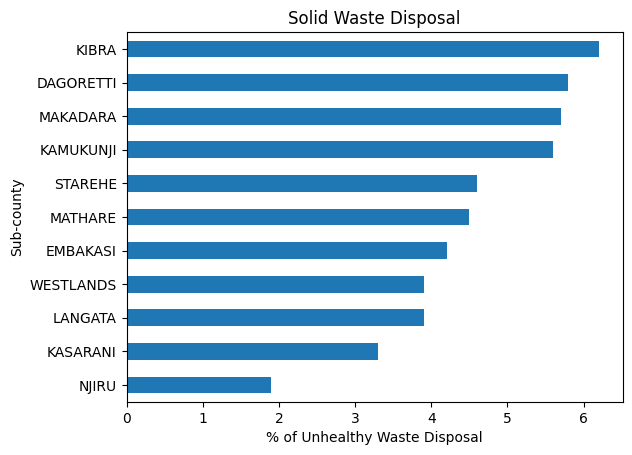

In [ ]:

col=['Cess pool', 'Pit Latrine uncovered', 'Bucket latrine', 'Open/ Bush']
df['Disposal_of_waste']=df['Cess pool']+df['Pit Latrine uncovered']+df['Bucket latrine']+df['Open/ Bush']
d=df.groupby('Sub-county')['Disposal_of_waste'].mean().sort_values()
d.plot(kind='barh', xlabel='% of Unhealthy Waste Disposal', title="Unhealthy Solid Waste Disposal" );


###Water Sources

In [ ]:
df_water.head()

,County/ Sub-County,Pond,Dam/ Lake,Stream/ River,Protected Spring,Unprotected Spring,Protected Well,Unprotected Well,Borehole/ Tube well,Piped into dwelling,Piped to yard/ Plot,Bottled water,Rain/ Harvested water,Water Vendor,Public tap/ Standpipe,Not Stated
0,KENYA,1.6,3.3,16.8,7.1,2.4,7.0,2.6,9.9,10.1,14.1,2.8,3.9,8.5,9.9,0.0
1,Rural,2.4,4.9,25.8,10.5,3.7,9.0,4.0,11.8,5.1,7.8,0.3,5.0,3.3,6.4,0.0
2,Urban,0.2,0.8,2.6,1.8,0.3,4.0,0.5,6.8,18.1,23.9,6.7,2.0,16.7,15.6,0.0
3,MOMBASA,0.1,0.2,0.1,1.2,0.1,4.6,0.4,5.2,7.2,5.2,11.4,0.3,43.5,20.5,0.0
4,CHANGAMWE,0.0,0.0,0.1,0.8,0.1,1.2,0.1,1.2,4.0,4.2,5.2,0.1,59.9,23.3,0.0


In [ ]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   County/ Sub-County     395 non-null    object 
 1   Pond                   384 non-null    float64
 2   Dam/ Lake              385 non-null    object 
 3   Stream/ River          388 non-null    float64
 4   Protected Spring       387 non-null    float64
 5   Unprotected Spring     385 non-null    float64
 6   Protected Well         383 non-null    float64
 7   Unprotected Well       386 non-null    float64
 8   Borehole/ Tube well    385 non-null    float64
 9   Piped into dwelling    391 non-null    float64
 10  Piped to yard/ Plot    391 non-null    float64
 11  Bottled water          383 non-null    float64
 12  Rain/ Harvested water  386 non-null    float64
 13  Water Vendor           383 non-null    float64
 14  Public tap/ Standpipe  385 non-null    float64
 15  Not St

<Axes: title={'center': 'Proportion of People Relying on easily Contaminated Water'}, xlabel='% of Reliance of easily Contaminated Water', ylabel='Sub_County'>

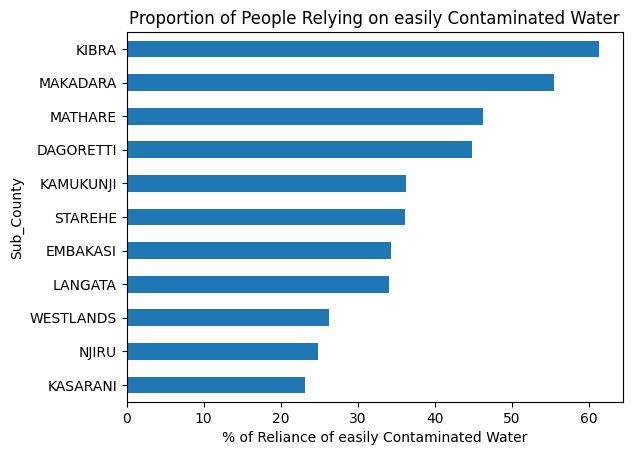

In [ ]:
df['water_sources']=df['Pond']+df["Stream/ River"]+df['Unprotected Spring']+df['Unprotected Well']+df['Water Vendor']+df['Public tap/ Standpipe']
water=df.groupby('Sub-county')['water_sources'].mean().sort_values()
water.plot(kind='barh', ylabel='Sub_County',
           xlabel='% of Reliance of easily Contaminated Water', title="Proportion of People Relying on easily Contaminated Water");